<a href="https://colab.research.google.com/github/franksalomon/Predictive-models-/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from IPython.display import HTML

HTML('''
<style>
.output_scroll {
    overflow-x: auto;
    max-height: none !important;
}
</style>
''')


# PROBLEMA 1

Dado el sistema de ecuaciones:

$$
x + y = 1
$$
$$
2x - y = 2
$$
$$
x + 2y = 2
$$

Este sistema es un sistema lineal con tres ecuaciones y dos incógnitas. Si lo representamos de forma matricial:

$$
A \cdot \mathbf{x} = \mathbf{b}
$$

donde:

$$
A = \begin{bmatrix} 1 & 1 \\ 2 & -1 \\ 1 & 2 \end{bmatrix}, \quad \mathbf{x} = \begin{bmatrix} x \\ y \end{bmatrix}, \quad \mathbf{b} = \begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix}
$$
___
##Resolución utilizando mínimos cuadrados:
La norma 1 se refiere a la norma de Manhattan o norma del valor absoluto, y la norma 2, también conocida como norma Euclidiana, se refiere a una medida de la magnitud de un vector en un espacio vectorial, y se define como la raíz cuadrada de la suma de los cuadrados de sus componentes.

La solución en la norma 1 para el problema de mínimos cuadrados es menos común que la solución en la norma 2 (que implica el uso de la pseudoinversa de la matriz \( A \)), pero se puede realizar con un enfoque basado en optimización.

Para obtener la solución en la norma 1, el objetivo es minimizar la suma de las diferencias absolutas entre las ecuaciones, lo que se traduce en el siguiente problema de optimización:

$$
\min_{\mathbf{x}} \| A \mathbf{x} - \mathbf{b} \|_1
$$

Aquí vamos a usar un muestreo aleatorio inteligente, centrado en la solución analítica de la norma 2. Esto se puede hacer usando una búsqueda aleatoria dentro de un intervalo que tenga sentido, alrededor de la solución inicial que obtenemos con la pseudoinversa en la norma 2.

### Plan para la implementación:

1. Calcular la solución en la norma 2 (que es la más común).
    
2. Establecer un intervalo de búsqueda centrado en la solución de la norma 2.
    
3. Implementar un muestreo aleatorio inteligente que explore el espacio alrededor de la solución en la norma 2 y minimice el error en la norma 1.

## Comparación entre Norma 1 y Norma 2

### Norma 1 (`ord = 1`) – Suma de valores absolutos

La norma 1 de un vector se define como:

$$
\|Ax - b\|_1 = \sum_i |(Ax - b)_i|
$$

**Características:**

- Penaliza todas las desviaciones por igual.
- Es más robusta ante valores extremos (outliers).
- Puede generar soluciones con pocos elementos distintos de cero.
- La función no es diferenciable en todos los puntos, por lo que no siempre se pueden usar métodos basados en gradiente.

---

### 🔹 Norma 2 (`ord = 2`) – Raíz cuadrada de la suma de cuadrados

La norma 2, también conocida como **norma euclidiana**, se define como:

$$
\|Ax - b\|_2 = \sqrt{\sum_i (Ax - b)_i^2}
$$

**Características:**

- Penaliza **más los errores grandes**, haciéndola sensible a outliers.
- Es la más común en problemas de mínimos cuadrados.
- Tiene solución analítica:

$$
x = (A^T A)^{-1} A^T b
$$

siempre que $A^T A$ sea invertible.

---

###  Nota importante: Solución de mínimos cuadrados e interpretación geométrica

En la minimización de la norma 2, la solución $x$ es tal que:

> $Ax$ es la **proyección ortogonal** de $b$ sobre el subespacio columna de $A$.

Esto implica que:

- Se busca el **punto más cercano a $b$** dentro del espacio generado por las columnas de $A$.
- Esta interpretación es clave para entender regresión lineal, PCA y otros modelos estadísticos.

---




In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------
# 1. Definir el sistema lineal
# ------------------------------
A = np.array([[1, 1], [2, -1], [1, 2]])  # Matriz de coeficientes
b = np.array([1, 2, 2])                 # Vector de términos independientes

# ------------------------------
# 2. Solución inicial (mejor ajuste en norma 2)
# ------------------------------
x0 = np.linalg.pinv(A) @ b  # Pseudoinversa de A

# ------------------------------
# 3. Minimización en norma 1 (L1)
# ------------------------------
def norma1(x):
    return np.sum(np.abs(A @ x - b))

historial_L1 = []

def registrar_L1(xk):
    historial_L1.append(norma1(xk))

res_L1 = minimize(norma1, x0, method='Nelder-Mead',
                  options={'xatol': 1e-6, 'disp': True},
                  callback=registrar_L1)

x_L1 = res_L1.x
print("Solución en la norma 1:", x_L1)

# ------------------------------
# 4. Minimización en norma 2 (L2)
# ------------------------------
def norma2(x):
    return np.linalg.norm(A @ x - b, ord=2)

historial_L2 = [norma2(x0)]

def registrar_L2(xk):
    historial_L2.append(norma2(xk))

res_L2 = minimize(norma2, x0, method='Nelder-Mead',
                  options={'xatol': 1e-6, 'disp': True},
                  callback=registrar_L2)

x_L2 = res_L2.x
print("Solución en la norma 2:", x_L2)




Optimization terminated successfully.
         Current function value: 0.600001
         Iterations: 57
         Function evaluations: 110
Solución en la norma 1: [1.19999961 0.39999996]
Optimization terminated successfully.
         Current function value: 0.507093
         Iterations: 32
         Function evaluations: 65
Solución en la norma 2: [1.11428571 0.31428571]


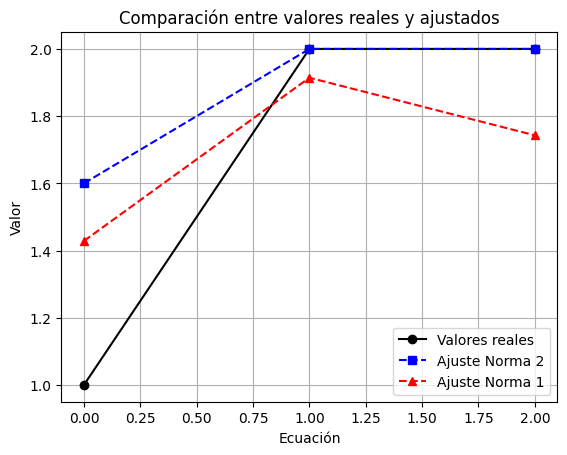

In [8]:
## Comparación de valores ajustados vs reales
b_norm2 = A @ x_L1  # Aproximaciones con norma 2
b_norm1 = A @ x_L2  # Aproximaciones con norma 1

plt.plot(b, 'ko-', label='Valores reales')
plt.plot(b_norm2, 'bs--', label='Ajuste Norma 2')
plt.plot(b_norm1, 'r^--', label='Ajuste Norma 1')
plt.title("Comparación entre valores reales y ajustados")
plt.xlabel("Ecuación")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()






#PROBLEMA 2
El sistema de ecuaciones es el siguiente:

\begin{aligned}
1. \quad & x^2 + y^2 = 1 \\
2. \quad & xy = 1 \\
3. \quad & x + y = 2
\end{aligned}


El problema inverso no lineal busca determinar los valores de \(x\) y \(y\) que satisfacen estas tres ecuaciones, lo que lo convierte en un sistema de ecuaciones no lineales.

### Definición de la función objetivo

Para resolver este problema, primero definimos una función objetivo $f(\mathbf{x})$ que consiste en la diferencia entre las ecuaciones dadas y las soluciones $x$ y $y$. Entonces, tenemos:

$$
f(\mathbf{x}) =
\begin{bmatrix}
x^2 + y^2 - 1 \\
xy - 1 \\
x + y - 2
\end{bmatrix}
$$

El vector $\mathbf{x} = \begin{bmatrix} x \\ y \end{bmatrix}$.

###  Método de Newton-Raphson

El método de Newton-Raphson es un procedimiento iterativo utilizado para resolver sistemas de ecuaciones no lineales. La iteración de Newton se expresa de la siguiente manera:

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - J(\mathbf{x}_k)^{-1} f(\mathbf{x}_k)
$$

Donde $J(\mathbf{x}_k)$ es la matriz Jacobiana y $f(\mathbf{x}_k)$ es el vector de funciones en el punto $\mathbf{x}_k$.

La matriz Jacobiana $J$ se define como:

$$
J = \begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y} \\
\frac{\partial f_3}{\partial x} & \frac{\partial f_3}{\partial y}
\end{bmatrix}
$$

Donde las derivadas parciales son:

$$
\frac{\partial f_1}{\partial x} = 2x, \quad \frac{\partial f_1}{\partial y} = 2y
$$

$$
\frac{\partial f_2}{\partial x} = y, \quad \frac{\partial f_2}{\partial y} = x
$$

$$
\frac{\partial f_3}{\partial x} = 1, \quad \frac{\partial f_3}{\partial y} = 1
$$

### Creeping y Jumping

- El **problema de Creeping** se refiere a un método que intenta aproximar la solución lentamente, generalmente mediante pequeños pasos o utilizando un punto inicial cercano a la solución.
  
- El **problema de Jumping** se refiere a un método más arriesgado que puede hacer grandes saltos en el espacio de soluciones, lo que puede ser útil si se tiene una buena aproximación inicial.

### Discusión de los resultados

- **Creeping**: El resultado obtenido con el método de Creeping es generalmente más preciso, ya que parte de un punto cercano a la solución esperada, y se mueve lentamente hacia la solución final.
  
- **Jumping**: El resultado obtenido con el método de Jumping puede ser más rápido, pero podría ser menos preciso dependiendo de cómo se elija el punto inicial. Si el punto inicial no está cerca de la solución, puede que el método salte a una región incorrecta y no


In [9]:

import numpy as np

# --- Definición del sistema de ecuaciones no lineales ---
def f1(x, y): return x**2 + y**2 - 1       # Circunferencia unitaria
def f2(x, y): return x * y - 1             # Hiperbola
def f3(x, y): return x + y - 2             # Recta

# Vector de funciones F(x, y)
def F(x, y):
    return np.array([f1(x, y), f2(x, y), f3(x, y)])

# Jacobiana 3x2 del sistema
def jacobian(x, y):
    return np.array([
        [2*x, 2*y],  # Gradientes de f1
        [y, x],      # Gradientes de f2
        [1, 1]       # Gradientes de f3
    ])

# --- Método de Newton con Creeping ---
def newton_creeping(x0, y0, tol=1e-6, max_iter=100, alpha=0.5):
    x, y = x0, y0
    print("\nMétodo Newton-Creeping:")
    for k in range(max_iter):
        J = jacobian(x, y)
        delta = np.linalg.pinv(J) @ F(x, y)  # Mínimos cuadrados
        x_new = x - alpha * delta[0]
        y_new = y - alpha * delta[1]

        # Mostrar avance
        normF = np.linalg.norm(F(x_new, y_new))
        print(f"Iteración {k+1}: x = {x_new:.6f}, y = {y_new:.6f}, ||F|| = {normF:.2e}")

        if normF < tol:
            return x_new, y_new

        x, y = x_new, y_new
    print("No convergió con Creeping.")
    return x, y

# --- Método de Newton con Jumping ---
def newton_jumping(x0, y0, tol=1e-6, max_iter=100):
    x, y = x0, y0
    print("\nMétodo Newton-Jumping:")
    for k in range(max_iter):
        J = jacobian(x, y)
        delta = np.linalg.pinv(J) @ F(x, y)  # Paso completo sin escala
        x_new = x - delta[0]
        y_new = y - delta[1]

        # Mostrar avance
        normF = np.linalg.norm(F(x_new, y_new))
        print(f"Iteración {k+1}: x = {x_new:.6f}, y = {y_new:.6f}, ||F|| = {normF:.2e}")

        if normF < tol:
            return x_new, y_new

        x, y = x_new, y_new
    print("No convergió con Jumping.")
    return x, y

# --- Ejecución del código ---
x0, y0 = 1.5, 0.5  ## se eligen estos puntos porque es un buena estimacion inicial par el algortimo y satisface la primera ecuación

# Resolver con Creeping
sol_creeping = newton_creeping(x0, y0)
print(f"\nSolución aproximada (Creeping): x = {sol_creeping[0]:.6f}, y = {sol_creeping[1]:.6f}")

# Resolver con Jumping
sol_jumping = newton_jumping(x0, y0)
print(f"\nSolución aproximada (Jumping): x = {sol_jumping[0]:.6f}, y = {sol_jumping[1]:.6f}")



Método Newton-Creeping:
Iteración 1: x = 1.184524, y = 0.720238, ||F|| = 9.38e-01
Iteración 2: x = 0.791683, y = 1.063966, ||F|| = 7.88e-01
Iteración 3: x = 1.344326, y = 0.486715, ||F|| = 1.11e+00
Iteración 4: x = 1.062230, y = 0.756675, ||F|| = 7.50e-01
Iteración 5: x = 0.546876, y = 1.266093, ||F|| = 9.71e-01
Iteración 6: x = 0.836859, y = 0.973218, ||F|| = 7.00e-01
Iteración 7: x = 1.916307, y = -0.107637, ||F|| = 2.95e+00
Iteración 8: x = 1.591342, y = 0.216645, ||F|| = 1.72e+00
Iteración 9: x = 1.313875, y = 0.493781, ||F|| = 1.05e+00
Iteración 10: x = 1.034493, y = 0.773002, ||F|| = 7.23e-01
Iteración 11: x = 0.447309, y = 1.360108, ||F|| = 1.14e+00
Iteración 12: x = 0.720227, y = 1.087152, ||F|| = 7.58e-01
Iteración 13: x = 1.161224, y = 0.646137, ||F|| = 8.28e-01
Iteración 14: x = 0.815353, y = 0.991999, ||F|| = 7.03e-01
Iteración 15: x = 1.658208, y = 0.149140, ||F|| = 1.93e+00
Iteración 16: x = 1.373496, y = 0.433849, ||F|| = 1.16e+00
Iteración 17: x = 1.101741, y = 0.70560